<a href="https://colab.research.google.com/github/rze7ud/DS3001_Final_Project/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

Our project is located in a private GitHub repository, therefore, in order to clone the repository we must attach a GitHub token to the link in the clone command. A .env file must be uploaded in our Google Colab instance which includes both the GitHub token and the API Key used in the data collection notebook.

In [ ]:
! pip install python-dotenv
from dotenv import load_dotenv
import os

load_dotenv()
GITHUB_TOKEN = os.getenv('GITHUB_TOKEN')

repo_url = f"https://{GITHUB_TOKEN}@github.com/rze7ud/DS3001_Final_Project/"

os.system(f"git clone {repo_url}")

32768

Next we are including all of the python imports that we use in this file:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

Here we read in our advanced data into pandas dataframes.

\* *Note: The season column in clemson_2021_2024.csv was saved as a float and must be converted into an int so we can merge later.*

# 2. EDA

We have 4 different scenarios that we are testing for both Clemson and SMU. \
1. Basic Stats, Season Totals
2. Basic Stats, Cumulative Weekly
3. Advanced Stats, Season Totals
4. Advanced Stats, Cumulative Weekly

**These were used to understand our datasets a little better, not necessarily to answer our prediction question that is stated later.**

## Season Total

### Clemson Basic Stats

clemson_season: 271x71 dataframe with season, week, scores, opponent basic season stats, and clemson basic season stats. Years range from 2001 to 2024.

In [ ]:
clemson_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_2001_2024.csv")

# clemson_season.info()

We decided that it would be interesting to create a histogram of how many penalties that Clemson and their opponents committed over the course of the season.

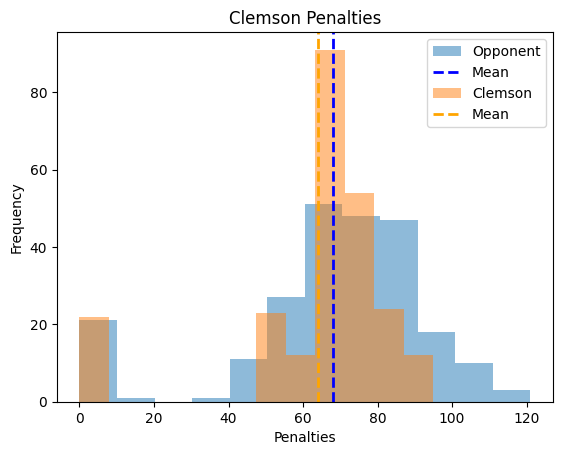

In [ ]:
plt.hist(clemson_season['opp_penalties'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(clemson_season['opp_penalties'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(clemson_season['penalties'], alpha=0.5, label='Clemson', bins=12)
mean = np.mean(clemson_season['penalties'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Clemson Penalties')
plt.xlabel('Penalties')
plt.ylabel('Frequency')
plt.show()

We also plotted the net passing yards against passes intercepted in a season. We predicted that a team with more passing yards would have less interceptions, however, we don't see visible correlation just by looking at the graph.

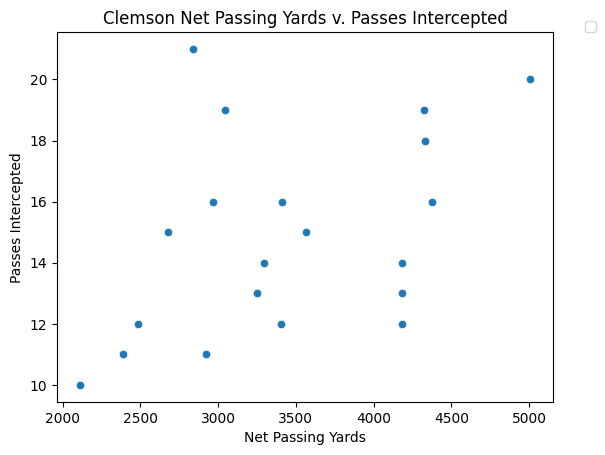

In [ ]:
sns.scatterplot(data=clemson_season, x='netPassingYards', y='passesIntercepted')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Clemson Net Passing Yards v. Passes Intercepted')
plt.xlabel('Net Passing Yards')
plt.ylabel('Passes Intercepted')
plt.show()

### SMU Basic Stats

We conducted the same SMU EDA to the previous Clemson one.

smu_season: 271x71 dataframe with season, week, scores, opponent basic season stats, and clemson basic season stats. Years range from 2001 to 2024.

In [ ]:
smu_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_2001_2024.csv")

last_row = len(smu_season)-1
cur_smu_short = smu_season.loc[last_row]
smu_season = smu_season.drop(smu_season.index[last_row])

# smu_season.info()

We created a similar histogram to the Previous Clemson one of how many penalties that SMU and their opponents committed over the course of the season. We found that SMU and their opponents have almost the exact same average penalties in a season (~69.1)

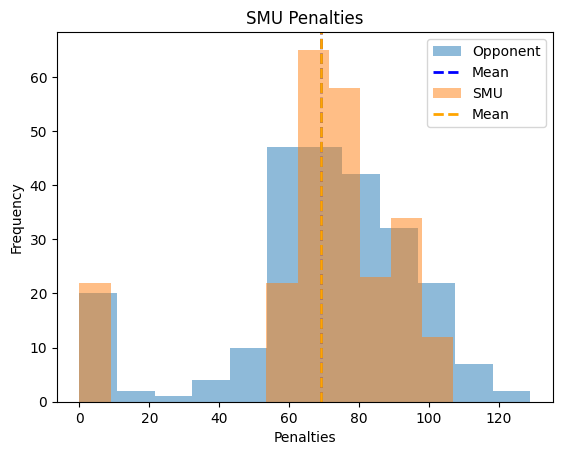

In [ ]:
plt.hist(smu_season['opp_penalties'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(smu_season['opp_penalties'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(smu_season['penalties'], alpha=0.5, label='SMU', bins=12)
mean = np.mean(smu_season['penalties'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('SMU Penalties')
plt.xlabel('Penalties')
plt.ylabel('Frequency')
plt.show()

We also created a matching scatterplot to Clemson's  \
\
Based off of reputation, SMU has had a past of being a more run-dominant team. This may help account for the lower amount of interceptions over teh course of their seasons.

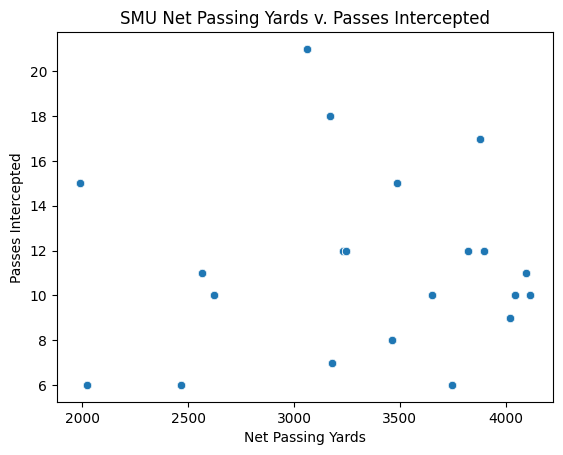

In [ ]:
sns.scatterplot(data=smu_season, x='netPassingYards', y='passesIntercepted')
plt.title('SMU Net Passing Yards v. Passes Intercepted')
plt.xlabel('Net Passing Yards')
plt.ylabel('Passes Intercepted')
plt.show()

### Clemson Advanced Stats

In [ ]:
clemson_adv_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_2001_2024.csv")
clemson_adv_season['season'] = clemson_adv_season['season'].astype(int)
clemson_adv_opp_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_opp_2001_2024.csv")

Dataframes:

* clemson_adv_season: 24x47 dataframe with season, defensive and offensive season statistics for Clemson. Years range from 2001 to 2024.
* clemson_adv_opp_season: 268x54 dataframe with season, week, matchup result, defensive and offensive season statistics for opponent each week of the season. Years range from 2001 to 2024.

In [ ]:
clemson_adv_season.info()
clemson_adv_opp_season.info()

We merged the dataframes together into the dataframe "clemson" so Clemson's season statistics were included each week. Since we collected season statistics, Clemson's stats are duplicated on each row of each season after the season statistics of the opponents.

In [ ]:
clemson_adv_season_combined = pd.merge_asof(clemson_adv_opp_season, clemson_adv_season, on ='season')

last_row = len(clemson_adv_season_combined)-1
cur_clemson = clemson_adv_season_combined.loc[last_row]
clemson_adv_season_combined = clemson_adv_season_combined.drop(clemson_adv_season_combined.index[last_row])

"Predicted Points Added" is an advanced sports analytics metric commonly used in football, it evaluates the impact of each play by comparing the expected points before and after the play. A positive EPA reflects a successful play that boosts the chances of scoring, while a negative EPA indicates a play that reduces scoring potential. We plotted this graph for both Clemson and their opponents and found that Clemson has a higher mean than their opponents at 128.05 compared to 81.59.

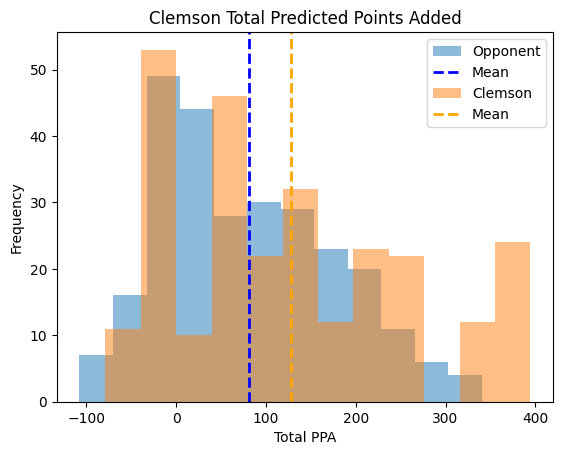

In [ ]:
plt.hist(clemson_adv_season_combined['opp_off_total_ppa'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(clemson_adv_season_combined['opp_off_total_ppa'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(clemson_adv_season_combined['off_total_ppa'], alpha=0.5, label='Clemson', bins=12)
mean = np.mean(clemson_adv_season_combined['off_total_ppa'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Clemson Total Predicted Points Added')
plt.xlabel('Total PPA')
plt.ylabel('Frequency')
plt.show()

We can see on the scatter plot of Clemson Points Scored v. Opponents Points scored, there is no obvious correlation between the variables nor clusters of conferences.

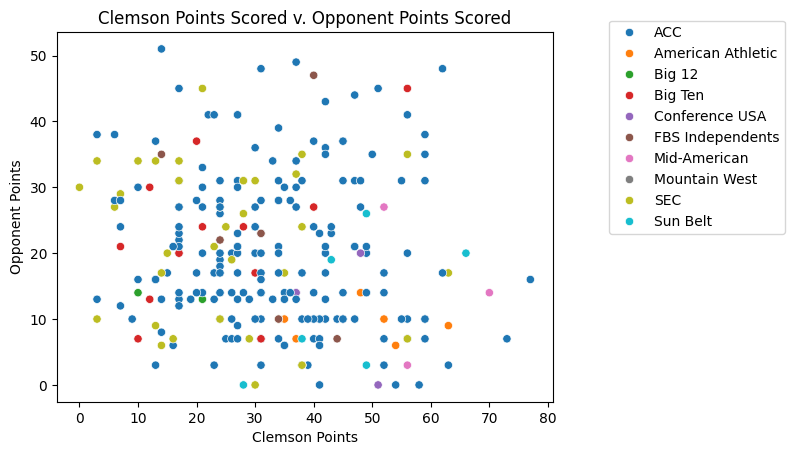

In [ ]:
clemson_adv_season_combined['opp_conference'] = clemson_adv_season_combined['opp_conference'].astype(str)
clemson_adv_season_combined['opp_conference'] = clemson_adv_season_combined['opp_conference'].astype('category')

sns.scatterplot(data=clemson_adv_season_combined, x='clemson_points', y='opp_points', hue='opp_conference')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Clemson Points Scored v. Opponent Points Scored')
plt.xlabel('Clemson Points')
plt.ylabel('Opponent Points')
plt.show()

### SMU Advanced Stats

Here we are matching the EDA from Clemson

In [ ]:
smu_adv_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_2001_2024.csv")
smu_adv_season['season'] = smu_adv_season['season'].astype(int)
smu_adv_opp_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_opp_2001_2024.csv")

In [ ]:
smu_adv_season_combined = pd.merge_asof(smu_adv_opp_season, smu_adv_season, on ='season')

last_row = len(smu_adv_season_combined)-1
cur_smu = smu_adv_season_combined.loc[last_row]
smu_adv_season_combined = smu_adv_season_combined.drop(smu_adv_season_combined.index[last_row])

We noticed that SMU and their opponents have a very similar Total PPA, however, SMU has a smaller standard deviation compared to their opponents.

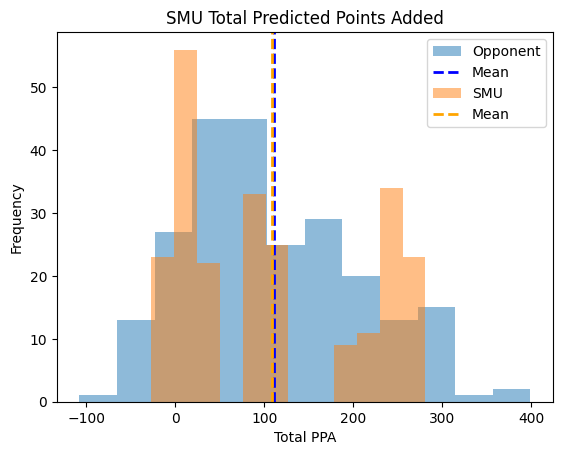

In [ ]:
plt.hist(smu_adv_season_combined['opp_off_total_ppa'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(smu_adv_season_combined['opp_off_total_ppa'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(smu_adv_season_combined['off_total_ppa'], alpha=0.5, label='SMU', bins=12)
mean = np.mean(smu_adv_season_combined['off_total_ppa'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('SMU Total Predicted Points Added')
plt.xlabel('Total PPA')
plt.ylabel('Frequency')
plt.show()

We noticed that SMU has many more matchups in the American Athletic conference because that's where they were until this past year where they transferred to the ACC. We can also note that there seems to be more Big 12 points above the line y=x which means that SMU may tend to lose against Big 12 teams since they score fewer points in matchups.

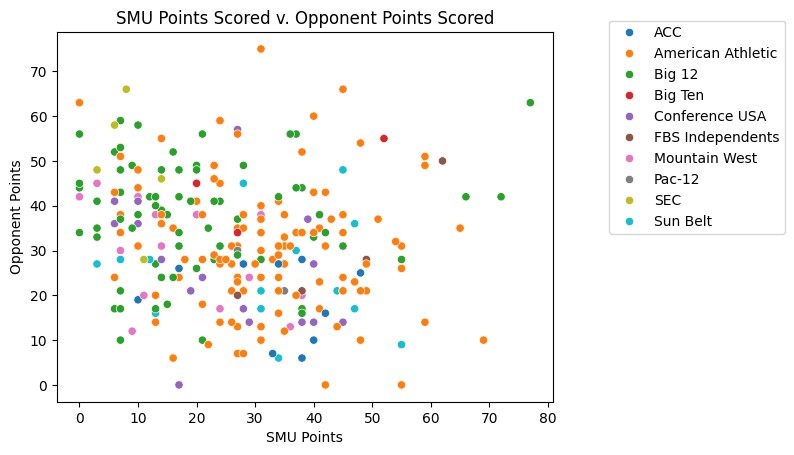

In [ ]:
smu_adv_season_combined['opp_conference'] = smu_adv_season_combined['opp_conference'].astype(str)
smu_adv_season_combined['opp_conference'] = smu_adv_season_combined['opp_conference'].astype('category')

sns.scatterplot(data=smu_adv_season_combined, x='smu_points', y='opp_points', hue='opp_conference')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('SMU Points Scored v. Opponent Points Scored')
plt.xlabel('SMU Points')
plt.ylabel('Opponent Points')
plt.show()

## Cumulative Weekly

### Clemson Basic Stats

In [ ]:
clemson_weekly = pd.read_csv("/content/DS3001_Final_Project/data/clemson_weekly_2001_2024.csv")

last_row = len(clemson_weekly)-1
clemson_weekly = clemson_weekly.drop(clemson_weekly.index[last_row])

# clemson_weekly.info()

By using the week by week totals of penalties, we notice that opponents earned a lot more penalties before they played Clemson.

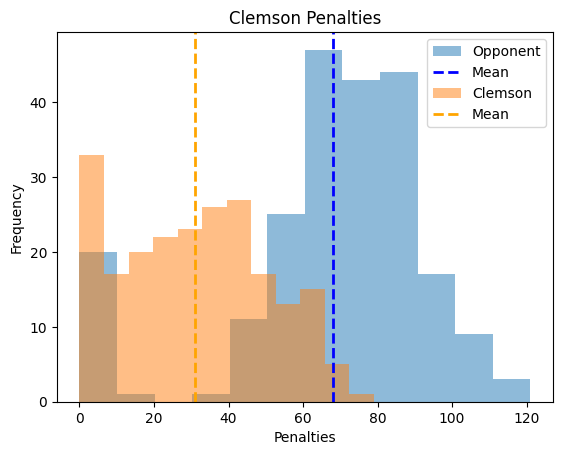

In [ ]:
plt.hist(clemson_weekly['opp_penalties'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(clemson_weekly['opp_penalties'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(clemson_weekly['penalties'], alpha=0.5, label='Clemson', bins=12)
mean = np.mean(clemson_weekly['penalties'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Clemson Penalties')
plt.xlabel('Penalties')
plt.ylabel('Frequency')
plt.show()

By using the cumulative weekly yards and interceptions, we see a much clearer correlation between these variables. There are also many more data points which gives more context.

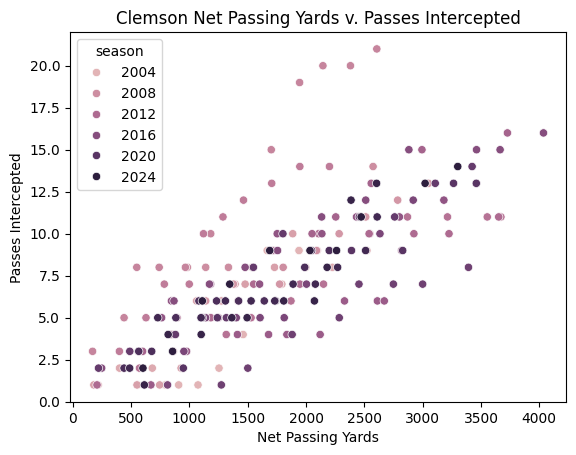

In [ ]:
sns.scatterplot(data=clemson_weekly, x='netPassingYards', y='passesIntercepted', hue='season')
plt.title('Clemson Net Passing Yards v. Passes Intercepted')
plt.xlabel('Net Passing Yards')
plt.ylabel('Passes Intercepted')
plt.show()

### SMU Basic Stats

In [ ]:
smu_weekly = pd.read_csv("/content/DS3001_Final_Project/data/smu_weekly_2001_2024.csv")

last_row = len(smu_weekly)-1
smu_weekly = smu_weekly.drop(smu_weekly.index[last_row])

# smu_weekly.info()

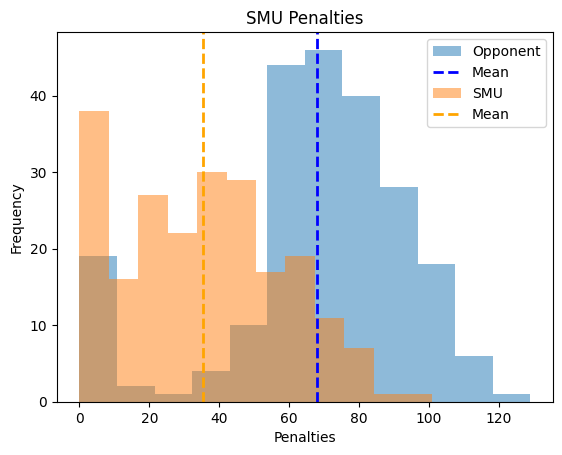

In [ ]:
plt.hist(smu_weekly['opp_penalties'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(smu_weekly['opp_penalties'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(smu_weekly['penalties'], alpha=0.5, label='SMU', bins=12)
mean = np.mean(smu_weekly['penalties'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('SMU Penalties')
plt.xlabel('Penalties')
plt.ylabel('Frequency')
plt.show()

There seem to be two different lines in the scatterplot that could be correlations. This could be due to different quarterbacks, but it is interesting that they aren't necessarily grouped by years.

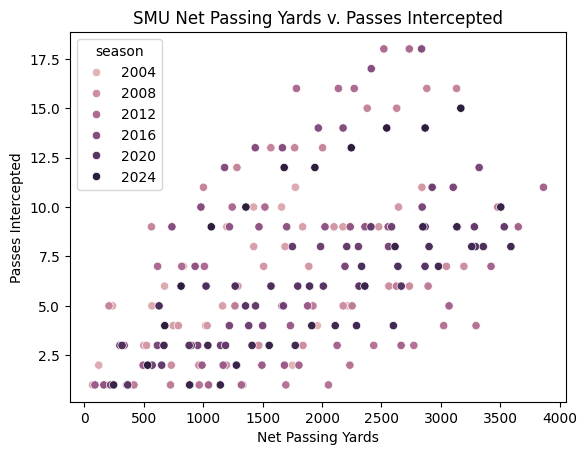

In [ ]:
sns.scatterplot(data=smu_weekly, x='netPassingYards', y='passesIntercepted', hue='season')
plt.title('SMU Net Passing Yards v. Passes Intercepted')
plt.xlabel('Net Passing Yards')
plt.ylabel('Passes Intercepted')
plt.show()

### Clemson Advanced Stats

In [ ]:
clemson_adv_weekly = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_weekly_2001_2024.csv")

last_row = len(clemson_adv_weekly)-1
clemson_adv_weekly = clemson_adv_weekly.drop(clemson_adv_weekly.index[last_row])

# clemson_adv_weekly.info()

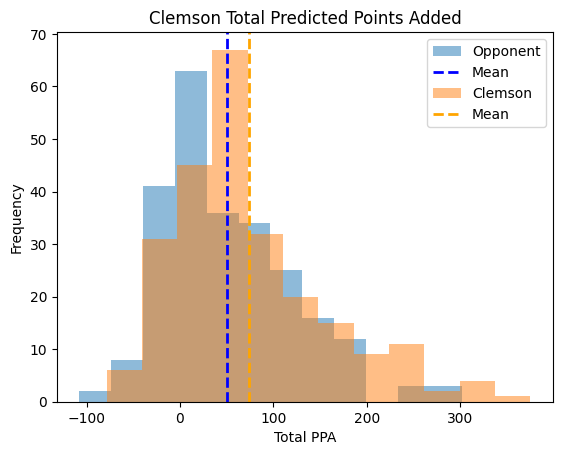

In [ ]:
plt.hist(clemson_adv_weekly['opp_off_total_ppa'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(clemson_adv_weekly['opp_off_total_ppa'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(clemson_adv_weekly['off_total_ppa'], alpha=0.5, label='Clemson', bins=12)
mean = np.mean(clemson_adv_weekly['off_total_ppa'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Clemson Total Predicted Points Added')
plt.xlabel('Total PPA')
plt.ylabel('Frequency')
plt.show()

### SMU Advanced Stats

In [ ]:
smu_adv_weekly = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_weekly_2001_2024.csv")

last_row = len(smu_adv_weekly)-1
smu_adv_weekly = smu_adv_weekly.drop(smu_adv_weekly.index[last_row])

# smu_adv_weekly.info()

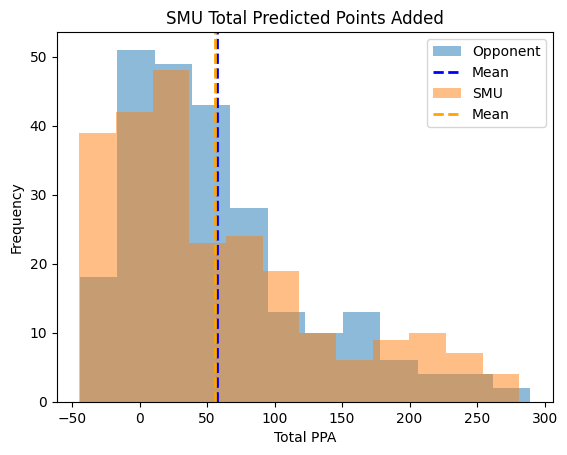

In [ ]:
plt.hist(smu_adv_weekly['opp_off_total_ppa'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(smu_adv_weekly['opp_off_total_ppa'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(smu_adv_weekly['off_total_ppa'], alpha=0.5, label='SMU', bins=12)
mean = np.mean(smu_adv_weekly['off_total_ppa'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('SMU Total Predicted Points Added')
plt.xlabel('Total PPA')
plt.ylabel('Frequency')
plt.show()

# 3. Prediction Question

**How do key season statistics (e.g., total yards, penalties, turnovers, advanced statistics) influence the prediction of the ACC championship winner and score?**

# 4. PCA & Linear Regression

This code was used to reset data in the case that the dataframes were modified while building the model.

In [ ]:
clemson_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_2001_2024.csv")

smu_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_2001_2024.csv")

clemson_adv_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_2001_2024.csv")
clemson_adv_season['season'] = clemson_adv_season['season'].astype(int)
clemson_adv_opp_season = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_opp_2001_2024.csv")
clemson_adv_season_combined = pd.merge_asof(clemson_adv_opp_season, clemson_adv_season, on ='season')

smu_adv_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_2001_2024.csv")
smu_adv_season['season'] = smu_adv_season['season'].astype(int)
smu_adv_opp_season = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_opp_2001_2024.csv")
smu_adv_season_combined = pd.merge_asof(smu_adv_opp_season, smu_adv_season, on ='season')

clemson_weekly = pd.read_csv("/content/DS3001_Final_Project/data/clemson_weekly_2001_2024.csv")


smu_weekly = pd.read_csv("/content/DS3001_Final_Project/data/smu_weekly_2001_2024.csv")


clemson_adv_weekly = pd.read_csv("/content/DS3001_Final_Project/data/clemson_advanced_weekly_2001_2024.csv")


smu_adv_weekly = pd.read_csv("/content/DS3001_Final_Project/data/smu_advanced_weekly_2001_2024.csv")

In [ ]:
datasets = {'clemson_season':clemson_season, 'smu_season':smu_season,
            'clemson_adv_season_combined':clemson_adv_season_combined, 'smu_adv_season_combined':smu_adv_season_combined,
            'clemson_weekly':clemson_weekly, 'smu_weekly':smu_weekly,
            'clemson_adv_weekly':clemson_adv_weekly, 'smu_adv_weekly':smu_adv_weekly}
point_labels = ['Clemson_points', 'SMU_points', 'clemson_points', 'smu_points', 'Clemson_points', 'SMU_points', 'clemson_points', 'smu_points']
pointer = 0
columns = ['Name', 'Clemson_Score_Prediction', 'SMU_Score_Prediction', 'PCA_Components', 'Train_r2', 'Test_r2']
output = pd.DataFrame(columns=columns)

for name, df in datasets.items():
    df.dropna(inplace=True)
    try:
        dummies = pd.get_dummies(df['opp_conference'])
        df = df.drop(['opp_conference'], axis=1)
        df = pd.concat([df, dummies], axis=1)
    except:
        pass
    y = df[[point_labels[pointer], 'opp_points']]
    X = df.drop(['win', point_labels[pointer], 'opp_points', 'opp'], axis=1)
    last_row = len(clemson_season)-1

    if pointer == 0:
        last_row = len(df)-1
        cur_clemson_short = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 1:
        last_row = len(df)-1
        cur_smu_short = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 2:
        last_row = len(df)-1
        cur_clemson_long = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 3:
        last_row = len(df)-1
        cur_smu_long = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 4:
        last_row = len(df)-1
        cur_clemson_short = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 5:
        last_row = len(df)-1
        cur_smu_short = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 6:
        last_row = len(df)-1
        cur_clemson_long = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    elif pointer == 7:
        last_row = len(df)-1
        cur_smu_long = df.iloc[[last_row]]
        df = df.drop(df.index[last_row])
    else:
        print('Error')
        break

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    max_train_r2 = -10
    max_test_r2 = -10
    r2_index = 0
    for i in range(1, len(df.columns)-3):
        reduction = PCA(n_components=i).fit(X_train)
        Z_train = reduction.transform(X_train)
        Z_test = reduction.transform(X_test)

        lm_k = LinearRegression().fit(Z_train,y_train)
        y_hat_test = lm_k.predict(Z_test)
        y_hat_train = lm_k.predict(Z_train)
        temp = r2_score(y_hat_test, y_test)
        max_test_r2 = max(max_test_r2, temp)
        if temp == max_test_r2:
            r2_index = i
            max_train_r2 = r2_score(y_hat_train, y_train)
            if pointer == 0:
                red_prediction = reduction.transform(cur_clemson_short.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 1:
                red_prediction = reduction.transform(cur_smu_short.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 2:
                red_prediction = reduction.transform(cur_clemson_long.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 3:
                red_prediction = reduction.transform(cur_smu_long.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 4:
                red_prediction = reduction.transform(cur_clemson_short.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 5:
                red_prediction = reduction.transform(cur_smu_short.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 6:
                red_prediction = reduction.transform(cur_clemson_long.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            elif pointer == 7:
                red_prediction = reduction.transform(cur_smu_long.drop(['win', 'opp_points', 'opp', point_labels[pointer]], axis=1))
            else:
                print('Error')
                break
            prediction = lm_k.predict(red_prediction)

    if pointer % 2 == 0:
        clemson_score = prediction[0][0]
        smu_score = prediction[0][1]
    else:
        clemson_score = prediction[0][1]
        smu_score = prediction[0][0]

    new_row = pd.DataFrame([{
        'Name': f"{name}:",
        'Clemson_Score_Prediction': clemson_score,
        'SMU_Score_Prediction': smu_score,
        'PCA_Components': r2_index,
        'Train_r2': max_train_r2,
        'Test_r2': max_test_r2
    }])
    output = pd.concat([output, new_row], ignore_index=True)
    pointer+=1
print(output)

<ipython-input-259-81decbf0b88b>:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat([output, new_row], ignore_index=True)


                           Name  Clemson_Score_Prediction  \
0               clemson_season:                 35.407901   
1                   smu_season:                 33.242062   
2  clemson_adv_season_combined:                 14.735559   
3      smu_adv_season_combined:                 15.408954   
4               clemson_weekly:                 37.225348   
5                   smu_weekly:                 34.427139   
6           clemson_adv_weekly:                 28.729590   
7               smu_adv_weekly:                 25.049639   

   SMU_Score_Prediction PCA_Components  Train_r2   Test_r2  
0             29.149619             39  0.556850 -0.448345  
1             30.516779             38  0.356287 -0.107069  
2             20.905353             81  0.328229 -0.021276  
3             39.113747             46  0.273395  0.111311  
4             32.294409             56  0.877145  0.303774  
5             28.647969             62  0.916533 -0.275980  
6             24.116402

# 5. Trees

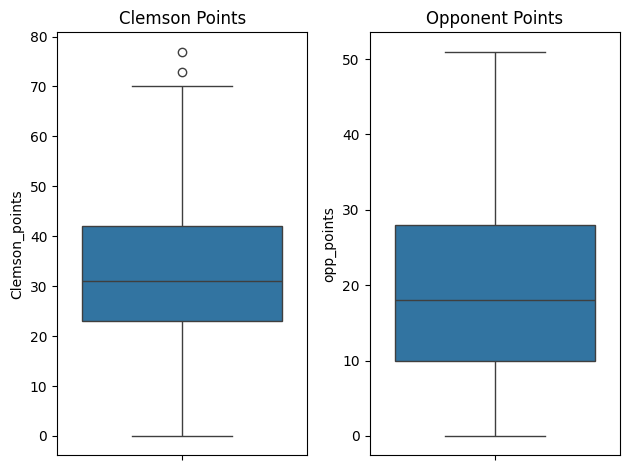

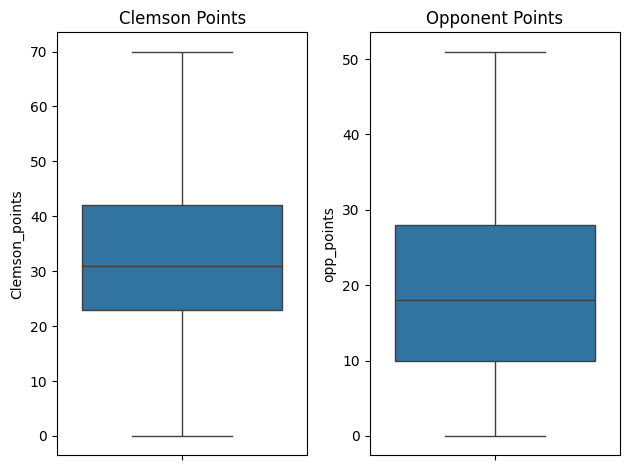

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

df = pd.read_csv("/content/DS3001_Final_Project/data/clemson_weekly_2001_2024.csv")

fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df['Clemson_points'], ax=axes[0])
axes[0].set_title("Clemson Points")
sns.boxplot(data=df['opp_points'], ax=axes[1])
axes[1].set_title("Opponent Points")
plt.tight_layout()
plt.show()

def winsorize(x):
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['Clemson_points'] = winsorize(df['Clemson_points'])
df['opp_points'] = winsorize(df['opp_points'])

fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df['Clemson_points'], ax=axes[0])
axes[0].set_title("Clemson Points")
sns.boxplot(data=df['opp_points'], ax=axes[1])
axes[1].set_title("Opponent Points")
plt.tight_layout()
plt.show()

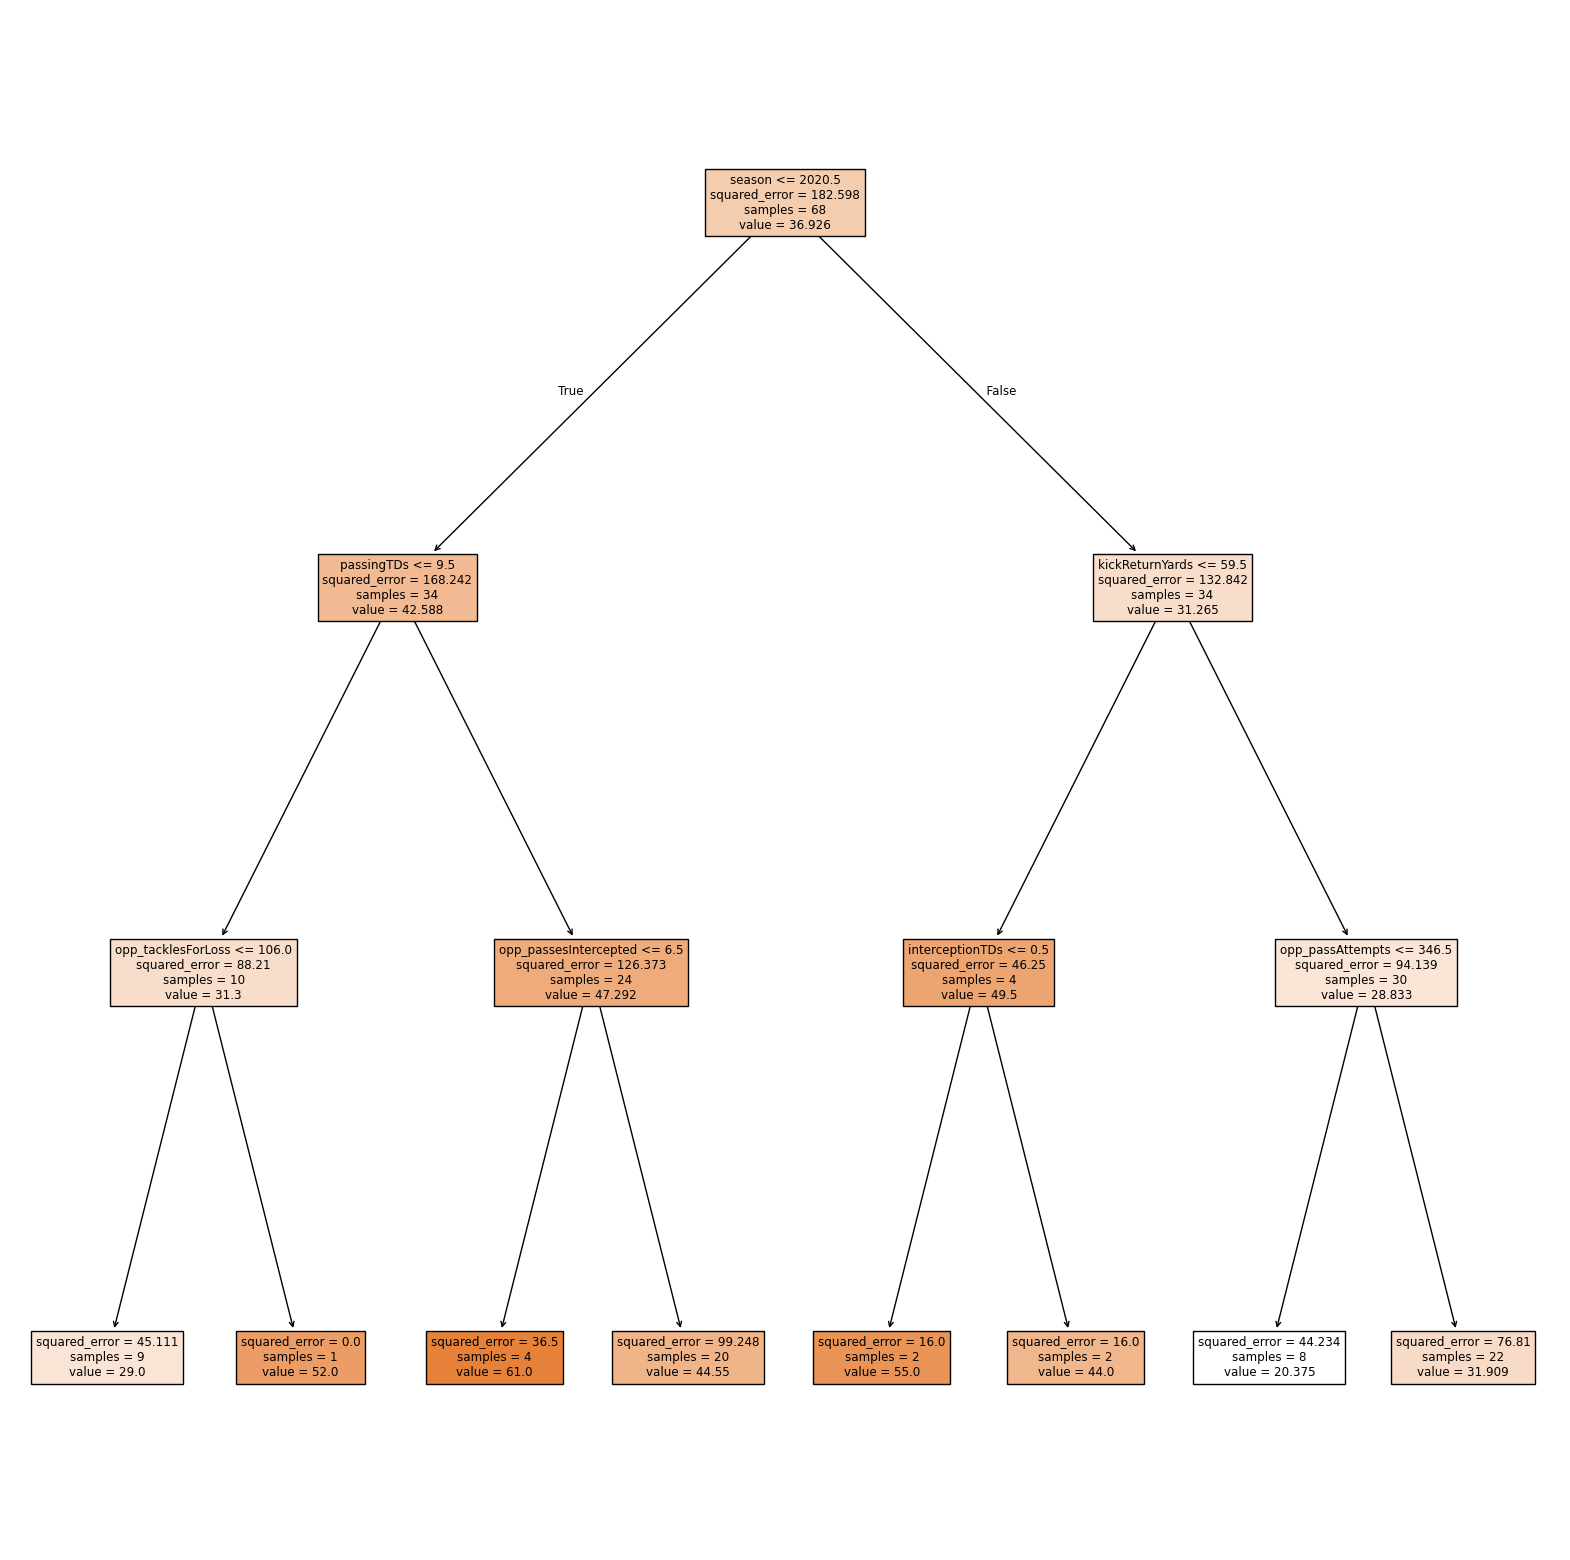

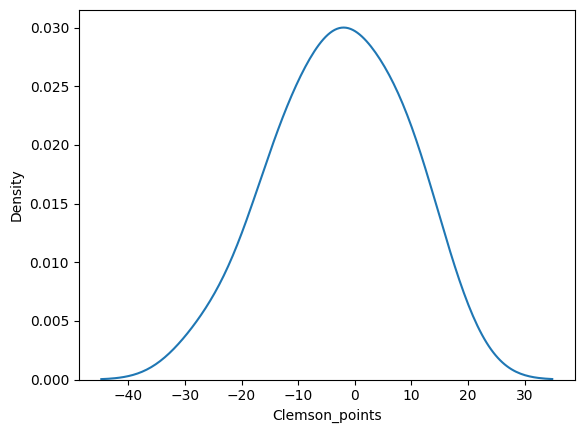

Rsq:  0.3309940304485314 

RMSE:  11.175085908072507 



In [ ]:
df.dropna(inplace=True)
y = df['Clemson_points']
X = df.drop(['Clemson_points', 'opp_points', 'win', 'opp', ], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=5)

cart = DecisionTreeRegressor(max_depth = 3)
cart = cart.fit(X_train, y_train)
var_names = cart.feature_names_in_

plt.figure(figsize=(20, 20))
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

y_hat = cart.predict(X_test)

e = y_test - y_hat
sns.kdeplot(e)
plt.show()
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

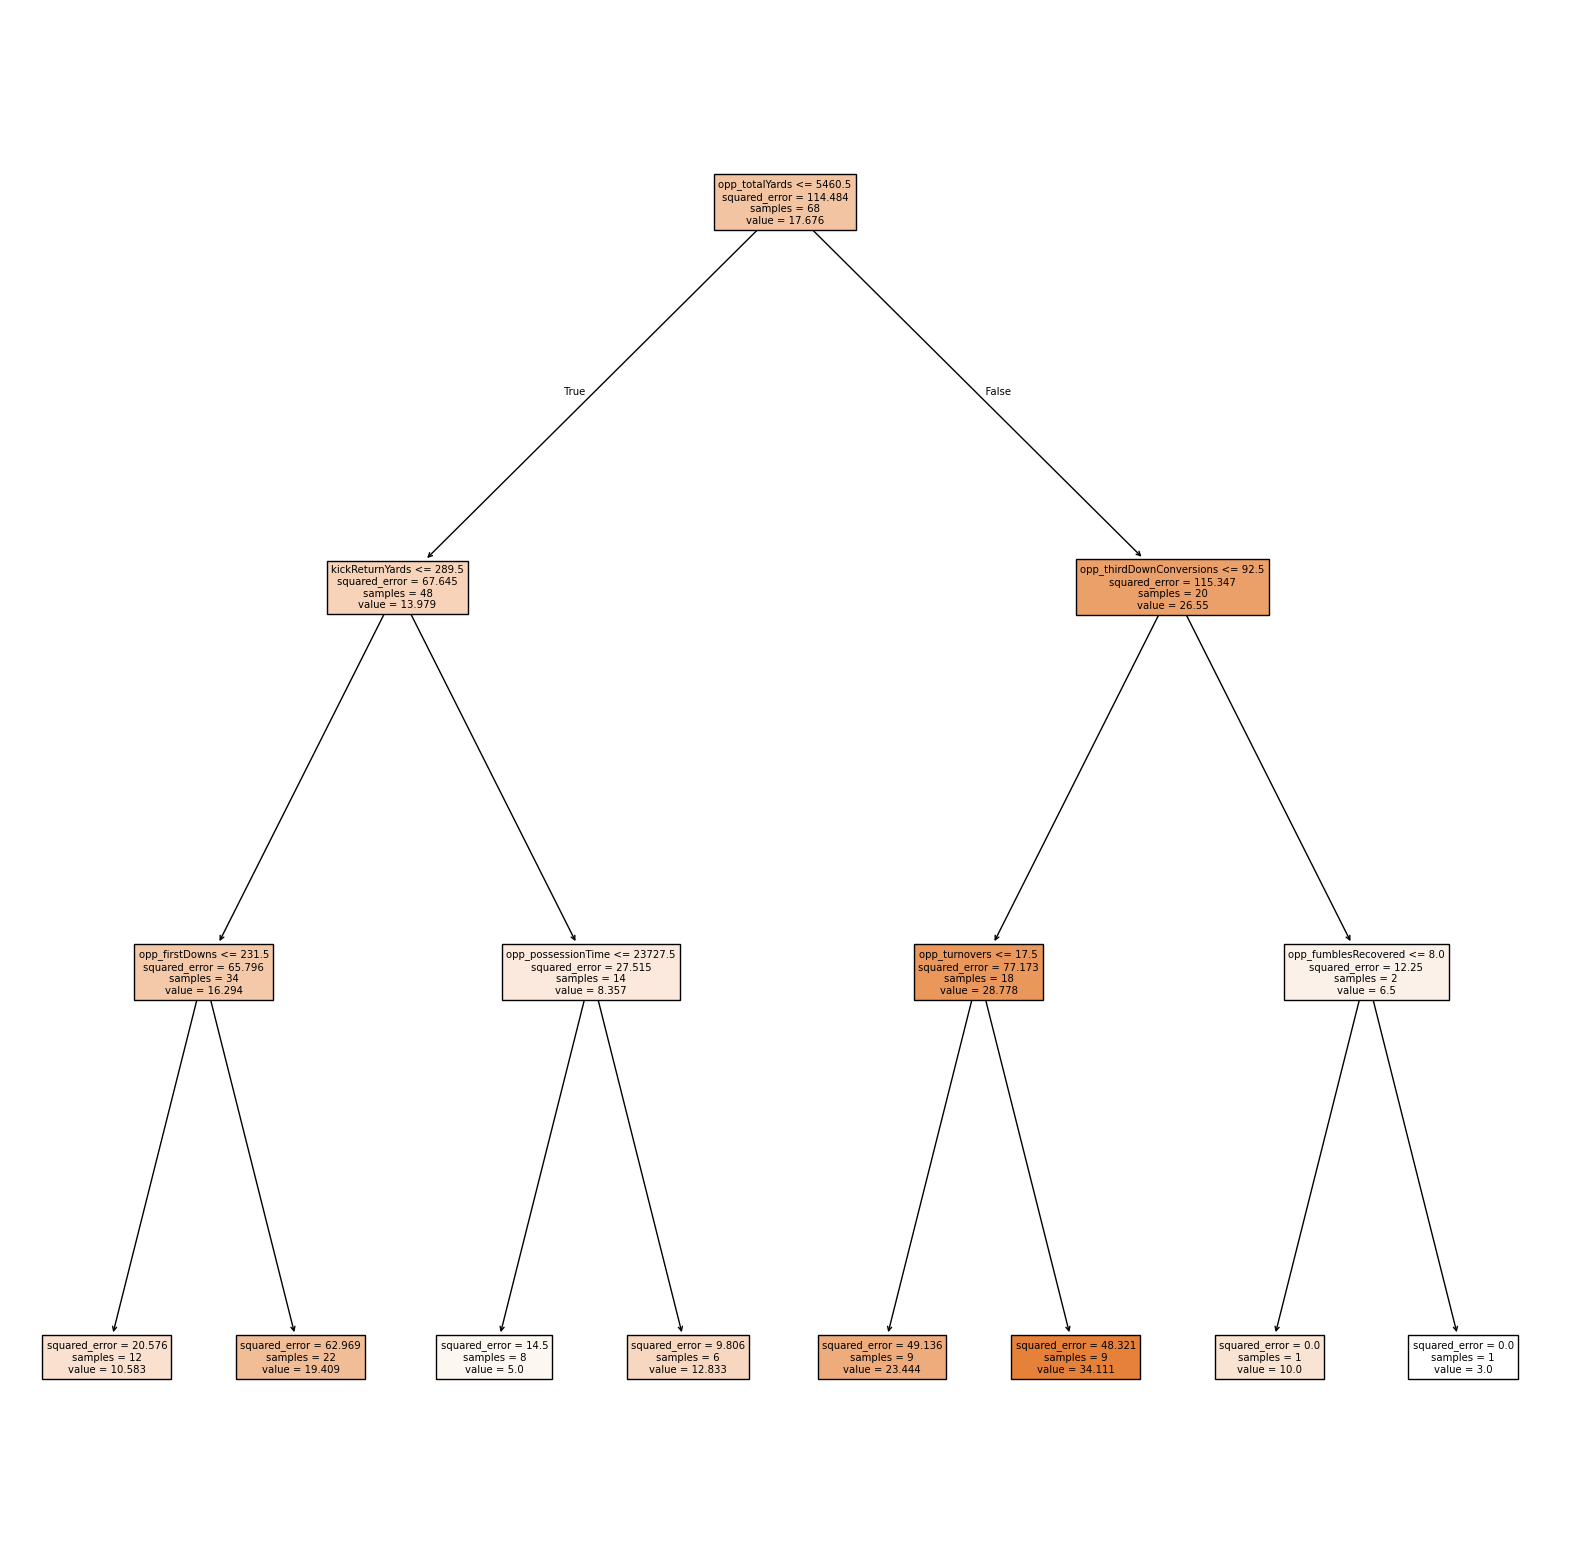

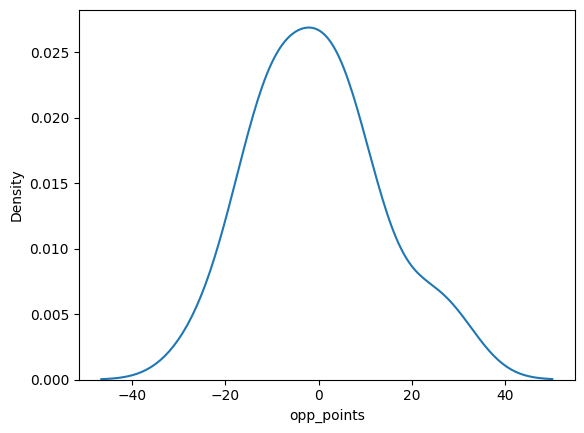

Rsq:  -0.30992484398149167 

RMSE:  12.970565583446618 



In [ ]:
df.dropna(inplace=True)
y = df['opp_points']
X = df.drop(['Clemson_points', 'opp_points', 'win', 'opp', ], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=5)

cart = DecisionTreeRegressor(max_depth = 3)
cart = cart.fit(X_train, y_train)
var_names = cart.feature_names_in_

plt.figure(figsize=(20, 20))
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

y_hat = cart.predict(X_test)

e = y_test - y_hat
sns.kdeplot(e)
plt.show()
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

# 6. Results



### **Prediction Question**
Can we predict a football team's season performance (measured by wins and net passing yards) based on team-specific statistics, such as penalties, turnovers, and interceptions?

This prediction could be particularly useful for coaching staff or analytics teams aiming to identify areas of improvement and make data-driven decisions during a season.

---

### **Key Results**
#### **Key Visualizations and Metrics**

1. **Penalties vs. Opponent Impact**  
   - **Plot**: A histogram of penalties by teams and opponents.
   - **Insight**: Teams with higher penalties tend to have a negative impact on their season performance. However, this relationship varies by opponent strength. This suggests penalties might correlate with performance but could be confounded by other factors like opponent quality.

2. **Scatter Plot: Net Passing Yards vs. Interceptions**  
   - **Plot**: Scatter plot showing the relationship between net passing yards and interceptions.  
   - **Insight**: A negative correlation is observed. Teams with higher interceptions tend to have lower net passing yards, suggesting that limiting turnovers may contribute to better offensive outcomes.

3. **Model Performance (Linear Regression and Decision Trees)**  
   - **Key Numbers**:
     - **PCA and Regression Model R²**: Shows moderate explanatory power for predicting wins based on key variables.
     - **Decision Tree Accuracy**: Indicates that non-linear relationships improve prediction accuracy slightly over regression.  
   - **Insight**: Linear regression struggles to capture complexities in the data, while decision trees improve performance by leveraging interactions between variables.

---

### **Discussion**
#### **Significance of Findings**
- **Why It Matters**: The findings highlight actionable insights for teams, such as reducing turnovers to improve passing efficiency and wins. Models like decision trees further underscore how interactions among variables (e.g., penalties, turnovers) influence outcomes.
- **Broader Context**: These results could guide coaches and analytics teams in focusing on areas that maximize season success.

#### **Criticisms and Concerns**
1. **Data Limitations**: The dataset spans 2001–2024 but does not control for changes in team rosters, coaching styles, or league rules, which may confound predictions.  
2. **Overfitting**: Decision trees, while accurate, may overfit to the data, limiting generalizability to new seasons or teams.
3. **Causality vs. Correlation**: For example, while penalties correlate with performance, the causal mechanism remains unclear. Penalties may reflect an aggressive playing style that is both a risk and a strength, depending on context.

---

### **Conclusion**
- **Key Takeaways**:  
  - Reducing turnovers is a critical factor for improving offensive outcomes.
  - Decision trees offer promising insights into complex relationships but require careful tuning to avoid overfitting.
  - Further analysis with richer datasets (e.g., player-level stats, contextual factors) could improve prediction accuracy and generalizability.

- **Recommendations**:
  - Incorporate opponent quality and team dynamics into future models.
  - Use ensemble methods like Random Forests or Gradient Boosting to address overfitting and enhance predictive power.
